### Steps Covered
- Generate Sample Data
- Create three model
    - Underfitting (Linear Model)
    - Good Fit (Polynomial Model of Degree 3)
    - Overfitting (High-Degree Polynomial Model, Degree 10)
- Visualize the Models 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 30).reshape(-1, 1)  # Feature
y = X**3 - 3*X**2 + 2 + np.random.normal(0, 2, X.shape)  # True function + noise

In [3]:
# Create different models
def create_poly_model(degree):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [4]:
# Fit Models
models = {
    "Underfitting (Degree 1)": create_poly_model(1),
    "Good Fit (Degree 3)": create_poly_model(3),
    "Overfitting (Degree 10)": create_poly_model(10)
}

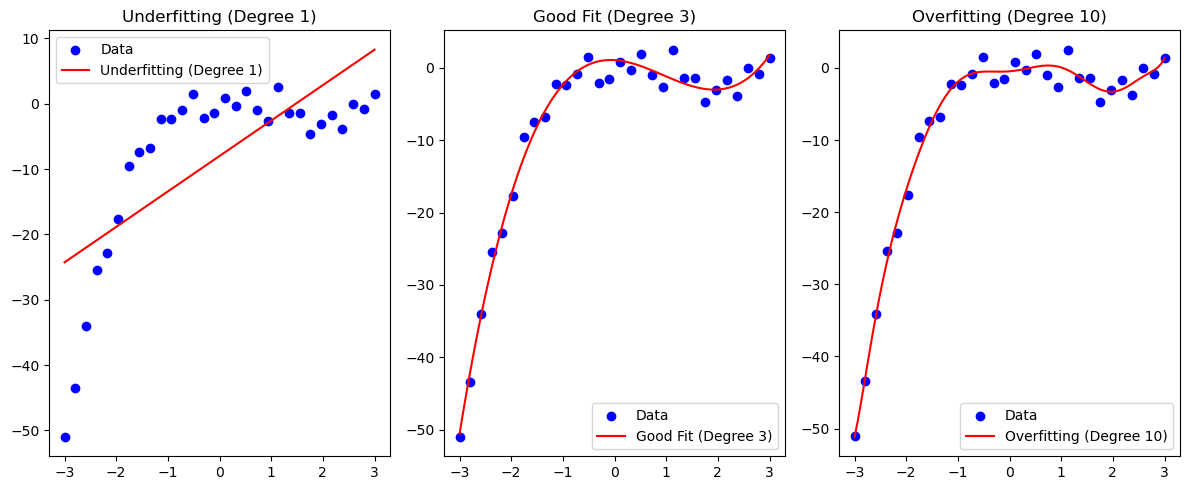

In [5]:
# Plot the models
plt.figure(figsize=(12, 5))
x_test = np.linspace(-3, 3, 100).reshape(-1, 1)

for i, (name, model) in enumerate(models.items()):
    model.fit(X, y)
    y_pred = model.predict(x_test)
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color="blue", label="Data")
    plt.plot(x_test, y_pred, color="red", label=name)
    plt.legend()
    plt.title(name)

plt.tight_layout()
plt.show()

#### Explanation 
1. Underfitting (Degree 1 – Linear Model)
- The model is too simple and fails to capture patterns in the data.
- High bias, low variance.
- Poor training and test performance.
2. Good Fit (Degree 3 – Polynomial Model)
- Captures the true pattern of the data without excessive complexity.
- Balanced bias-variance tradeoff.
- Good training and test performance.
3. Overfitting (Degree 10 – High-Complexity Model)
- Fits the training data perfectly but captures noise instead of general patterns.
- Low bias, high variance.
- Great training performance, poor test performance.